<a href="https://colab.research.google.com/github/pranoob26/Prodigy_DS_3/blob/main/Prodigy_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prodigy DS Internship Task 3**

## Making a decision tree classifier

## **Import necessary libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree

# **Loading of data**

In [ ]:
d=pd.read_csv('/content/bank data - bank-full - bank data - bank-full (1).csv', header=0, sep=',');
df=pd.DataFrame(data=d)
df.head

<bound method NDFrame.head of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married        NaN      no     1506     yes   no   
4       33           NaN    single        NaN      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day

# **Dropping the empty columns**

In [ ]:
df.dropna(axis=0,inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7842 entries, 24060 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7842 non-null   int64 
 1   job        7842 non-null   object
 2   marital    7842 non-null   object
 3   education  7842 non-null   object
 4   default    7842 non-null   object
 5   balance    7842 non-null   int64 
 6   housing    7842 non-null   object
 7   loan       7842 non-null   object
 8   contact    7842 non-null   object
 9   day        7842 non-null   int64 
 10  month      7842 non-null   object
 11  duration   7842 non-null   int64 
 12  campaign   7842 non-null   int64 
 13  pdays      7842 non-null   int64 
 14  previous   7842 non-null   int64 
 15  poutcome   7842 non-null   object
 16  y          7842 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.1+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['job'] = le.fit_transform(df['job'])
df['job']=df['job'].astype(float)

df['marital'] = le.fit_transform(df['marital'])
df['marital']=df['marital'].astype(float)

df['education'] = le.fit_transform(df['education'])
df['education']=df['education'].astype(float)

df['poutcome'] = le.fit_transform(df['poutcome'])
df['poutcome']=df['poutcome'].astype(float)

df['month'] = le.fit_transform(df['month'])
df['month']=df['month'].astype(float)

df['contact'] = le.fit_transform(df['contact'])
df['contact']=df['contact'].astype(float)

df['housing'] = le.fit_transform(df['housing'])
df['housing']=df['housing'].astype(float)

df['default'] = le.fit_transform(df['default'])
df['default']=df['default'].astype(float)

df['loan'] = le.fit_transform(df['loan'])
df['loan']=df['loan'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7842 entries, 24060 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        7842 non-null   int64  
 1   job        7842 non-null   float64
 2   marital    7842 non-null   float64
 3   education  7842 non-null   float64
 4   default    7842 non-null   float64
 5   balance    7842 non-null   int64  
 6   housing    7842 non-null   float64
 7   loan       7842 non-null   float64
 8   contact    7842 non-null   float64
 9   day        7842 non-null   int64  
 10  month      7842 non-null   float64
 11  duration   7842 non-null   int64  
 12  campaign   7842 non-null   int64  
 13  pdays      7842 non-null   int64  
 14  previous   7842 non-null   int64  
 15  poutcome   7842 non-null   float64
 16  y          7842 non-null   object 
dtypes: float64(9), int64(7), object(1)
memory usage: 1.1+ MB


# **Defining X and Y for test and train split**

In [ ]:
X=df.values[:,1:16]
print('These are the X values')
print(X)

Y=df.values[:,16]
print('These are the Y values')
print(Y)


These are the X values
[[0.0 1.0 2.0 ... 151 3 0.0]
 [0.0 2.0 1.0 ... 166 1 1.0]
 [7.0 1.0 1.0 ... 91 4 0.0]
 ...
 [5.0 1.0 1.0 ... 40 8 0.0]
 [5.0 1.0 1.0 ... 184 3 2.0]
 [2.0 1.0 1.0 ... 188 11 1.0]]
These are the Y values
['no' 'yes' 'yes' ... 'yes' 'yes' 'no']


# **Test-Train split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123, shuffle=True)

# **Model Fitting**

In [ ]:
mytree=DecisionTreeClassifier(criterion='gini',max_depth=4)
mytree.fit(X_train,Y_train)
pred=mytree.predict(X_test)
print(classification_report(Y_test, pred))
print("Our model has achieved an accuracy of ", accuracy_score(Y_test, pred)*100, "%", sep="")

              precision    recall  f1-score   support

          no       0.90      0.89      0.90      1839
         yes       0.63      0.65      0.64       514

    accuracy                           0.84      2353
   macro avg       0.77      0.77      0.77      2353
weighted avg       0.84      0.84      0.84      2353

Our model has achieved an accuracy of 84.06289842753931%


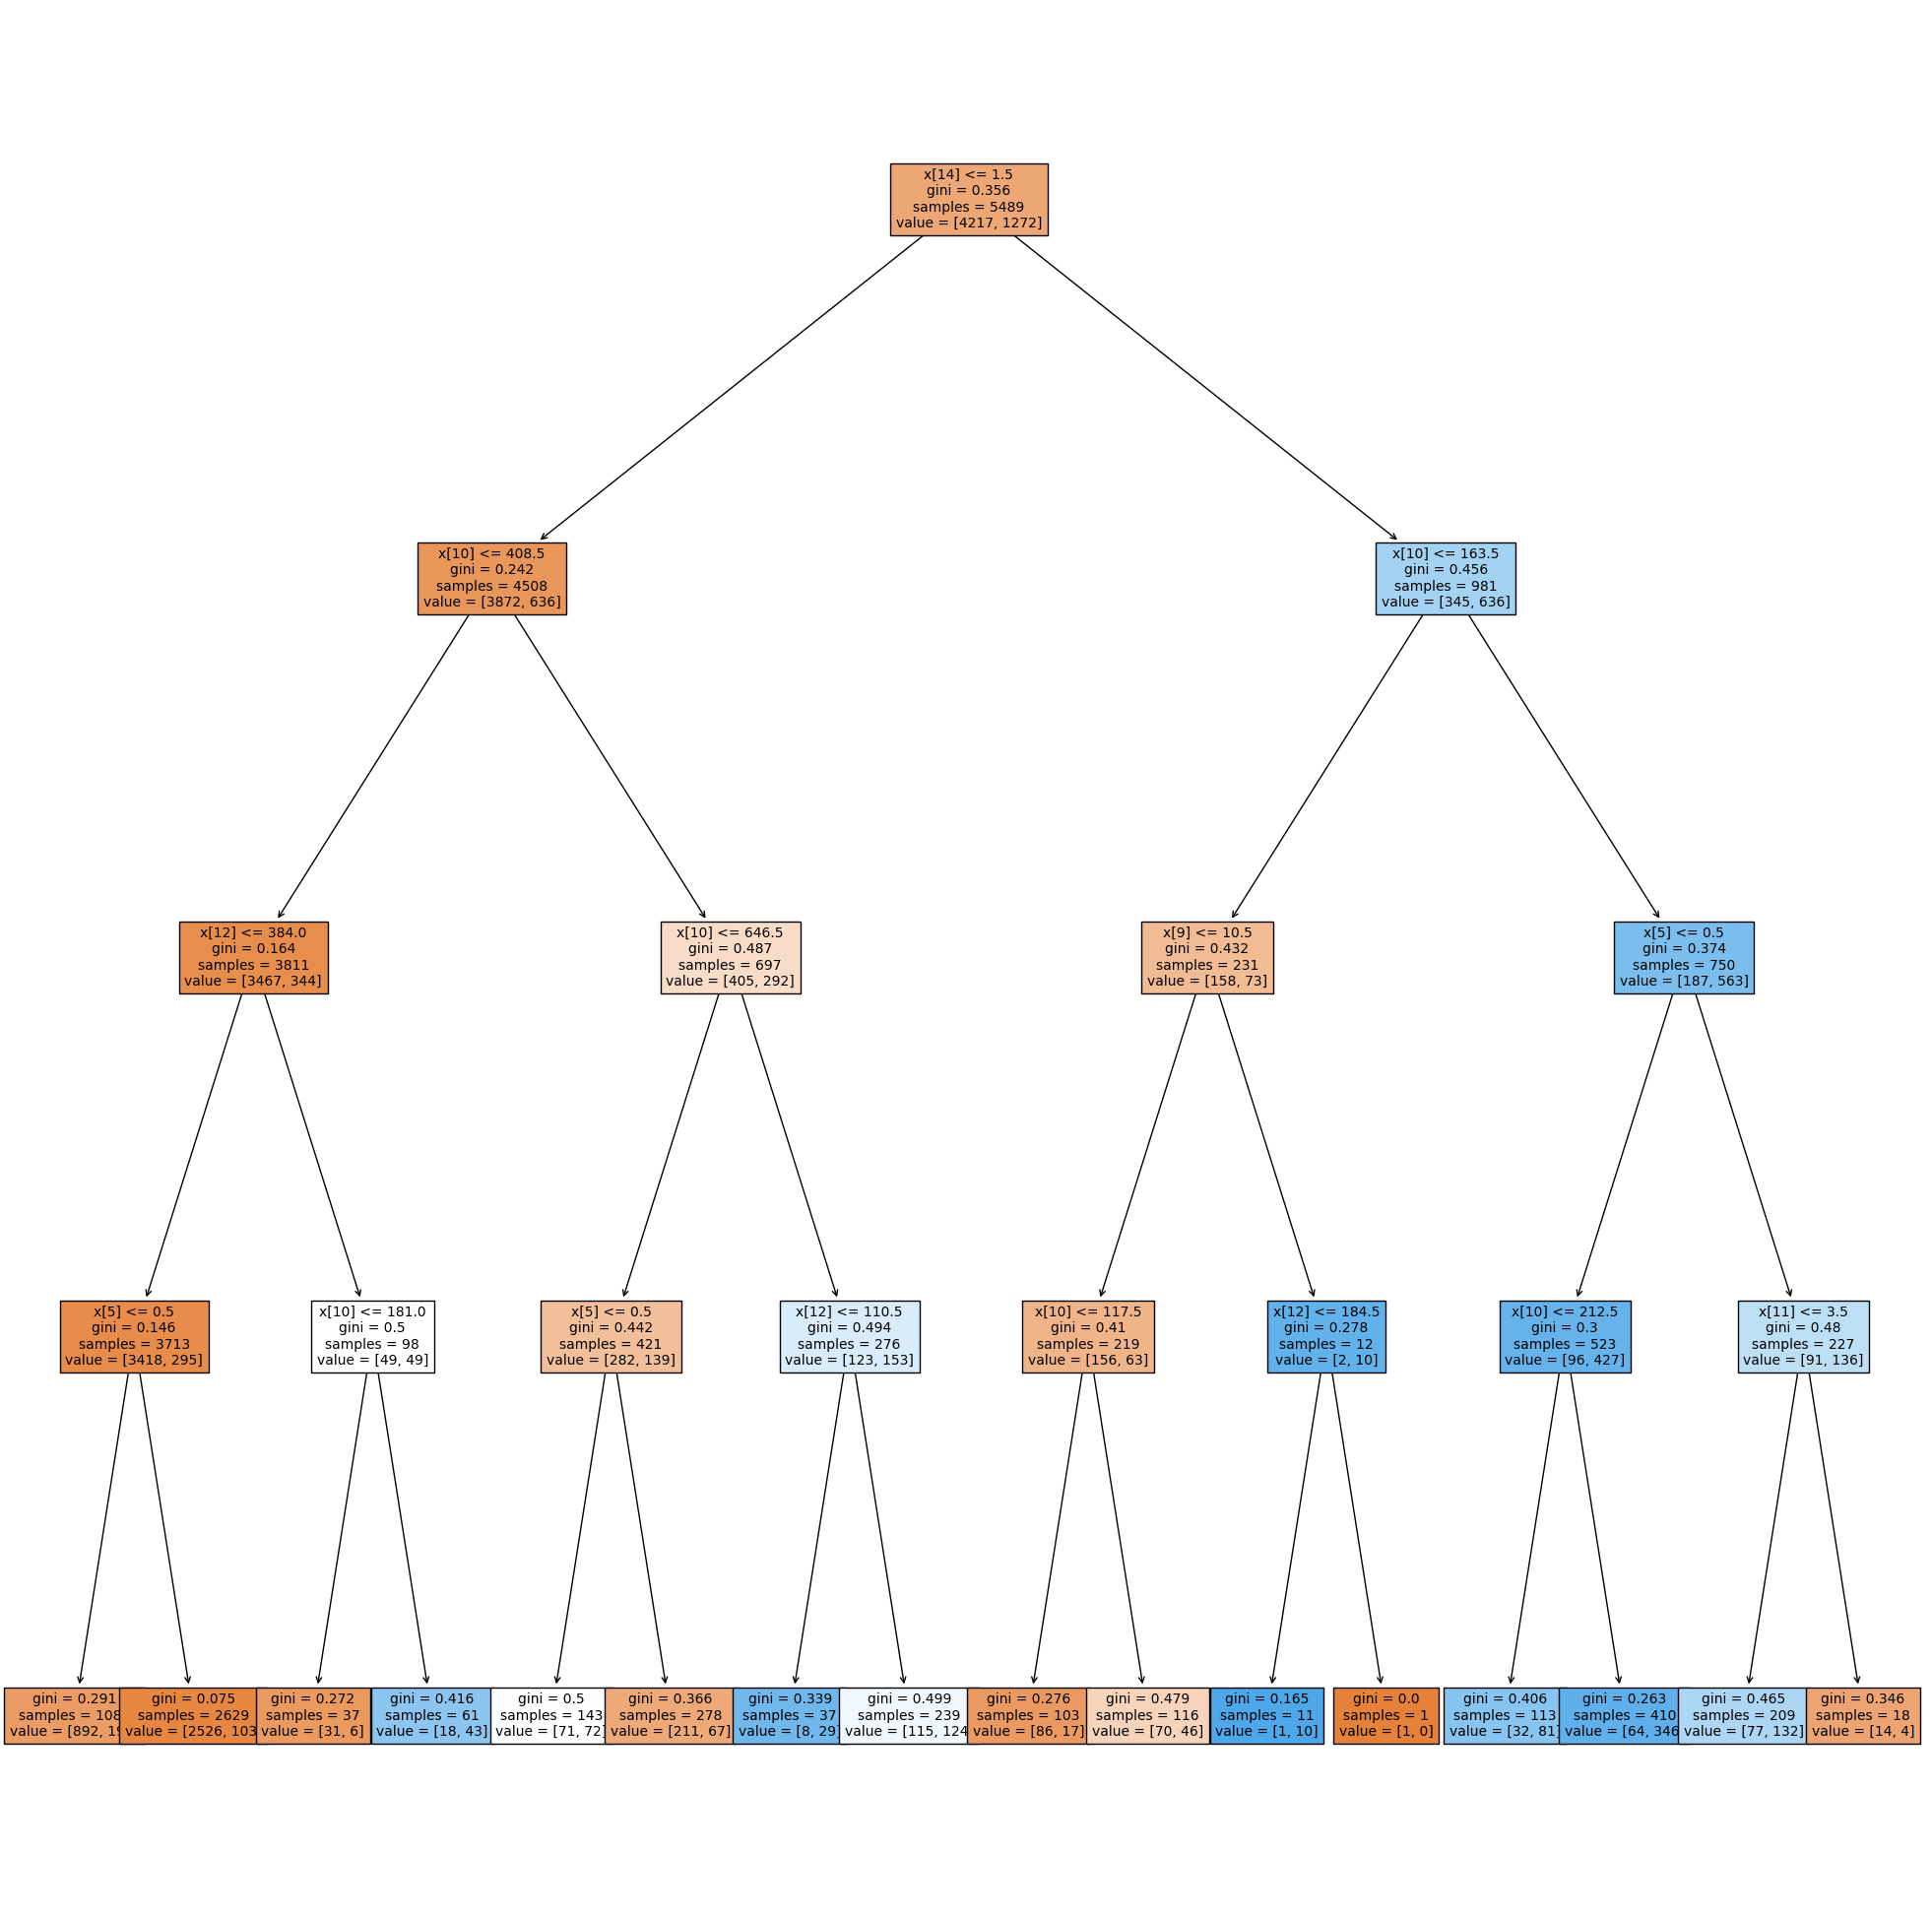

In [ ]:
from sklearn import tree
plt.figure(figsize=(25, 25))
tree.plot_tree(mytree, rounded=False,filled=True,fontsize=10)
plt.show()